First create a combined csv that can be inported easily as mulit-index dataframe 

Something like this: 

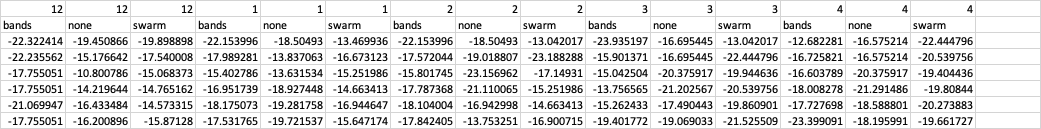

Then bring in the data into pandas 

In [17]:
import pandas as pd
a = pd.read_csv('S1_Helen/S1_3monthsMed.csv', header=[0, 1])
a.head()

12                                1                        \
       bands       none      swarm      bands       none      swarm   
0 -22.322414 -19.450866 -19.898898 -22.153996 -18.504930 -13.469936   
1 -22.235562 -15.176642 -17.540008 -17.989281 -13.837063 -16.673123   
2 -17.755051 -10.800786 -15.068373 -15.402786 -13.631534 -15.251986   
3 -17.755051 -14.219644 -14.765162 -16.951739 -18.927448 -14.663413   
4 -21.069947 -16.433484 -14.573315 -18.175073 -19.281758 -16.944647   

           2                                3                        \
       bands       none      swarm      bands       none      swarm   
0 -22.153996 -18.504930 -13.042017 -23.935197 -16.695445 -13.042017   
1 -17.572044 -19.018807 -23.188288 -15.901371 -16.695445 -22.444796   
2 -15.801745 -23.156962 -17.149310 -15.042504 -20.375917 -19.944636   
3 -17.787368 -21.110065 -15.251986 -13.756565 -21.202567 -20.539756   
4 -18.104004 -16.942998 -14.663413 -15.262433 -17.490443 -19.860901   

           4                        
       bands       none      swarm  
0 -12.682281 -16.575214 -22.444796  
1 -16.725821 -16.575214 -20.539756  
2 -16.603789 -20.375917 -19.404436  
3 -18.008278 -21.291486 -19.808440  
4 -17.727698 -18.588801 -20.273883

Next we want to unstack it to make it "long form". This will make it easier for plotting in seaborn

In [18]:
b = a.unstack(level=0).reset_index(level=2, drop=True).reset_index(name='data')
b.head()

,level_0,level_1,data
0,12,bands,-22.322414
1,12,bands,-22.235562
2,12,bands,-17.755051
3,12,bands,-17.755051
4,12,bands,-21.069947


Rename so we know what's what

In [21]:
b.columns = ['Month', 'Observations', 'Backscatter']
b.head()

,Month,Observations,Backscatter
0,12,bands,-22.322414
1,12,bands,-22.235562
2,12,bands,-17.755051
3,12,bands,-17.755051
4,12,bands,-21.069947


Annnnnddddddd wahla! one liner from seaborn!

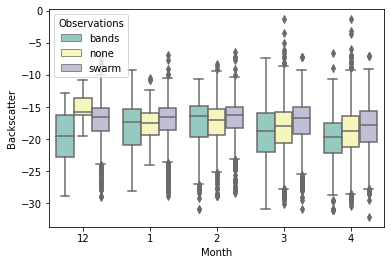

In [22]:
import seaborn
#ax = seaborn.boxplot(x='level_0', y='data', hue="level_1",
                 #data=b, palette="Set3")
ax = seaborn.boxplot(x='Month', y='Backscatter', hue="Observations",
                 data=b, palette="Set3")

Not a fan of pastels? change the set. You can look at all the optioins [here](https://seaborn.pydata.org/tutorial/color_palettes.html)

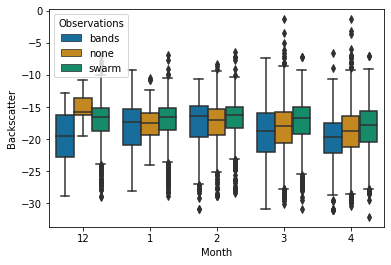

In [24]:
ax = seaborn.boxplot(x='Month', y='Backscatter', hue="Observations",
                 data=b, palette="colorblind")

If you import matplotlib you can change the location of the legend so it's not in the way. You can also change how wide/narrow it is via ncols. 

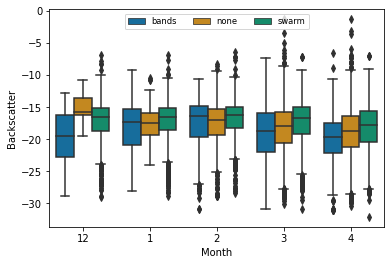

In [35]:
import matplotlib.pyplot as plt

seaborn.boxplot(x='Month', y='Backscatter', hue="Observations",
                 data=b, palette="colorblind")
plt.legend(ncol=3, loc='upper center', fontsize='small')

Or if you want to put it outside the plot, use the _bbox_to_anchor_ option 

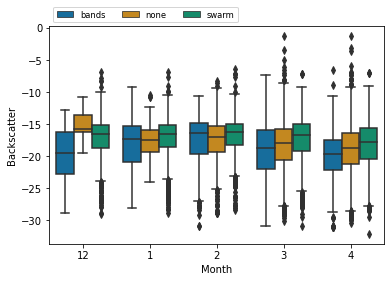

In [40]:
seaborn.boxplot(x='Month', y='Backscatter', hue="Observations",
                 data=b, palette="colorblind")
plt.legend(ncol=3, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')